## Melhorar Imagens com Operações Matematicas
- Operações artimeticas: somar, multiplicar
- Threshold e Masking
- Bitwise operations like OR, XOR, AND

In [2]:
# Importar bibliotecas
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image

%matplotlib inline

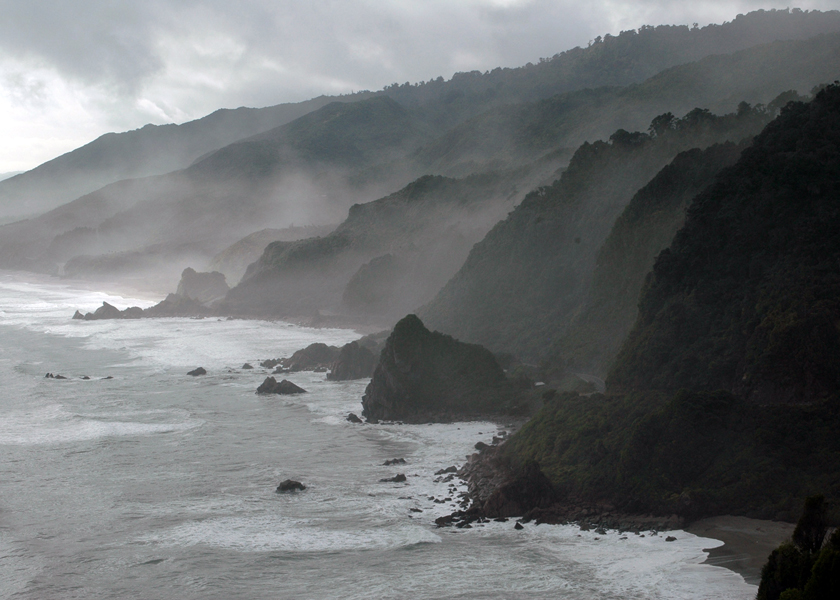

In [5]:
# Carregar imagem original
img_bgr = cv.imread("./img/New_Zealand_Coast.jpg", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Mostar imagem original
Image(filename="./img/New_Zealand_Coast.jpg")

###  Controlar Brilho

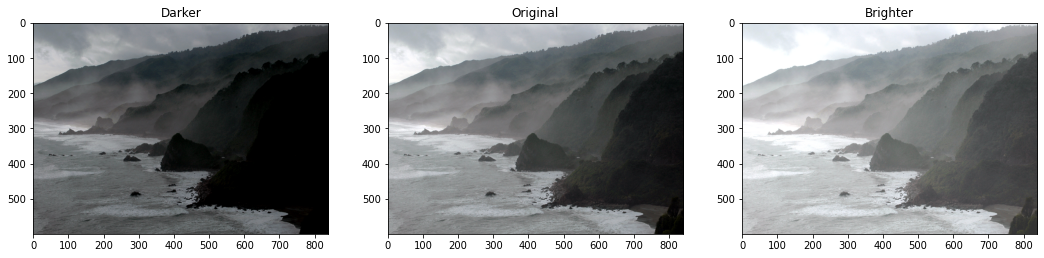

In [10]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

# Menos brilho
img_rgb_darker = cv.subtract(img_rgb, matrix)

# Mais brilho
img_rgb_brighter = cv.add(img_rgb, matrix)

# Mostar imagens
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter");

### Controlar Contraste

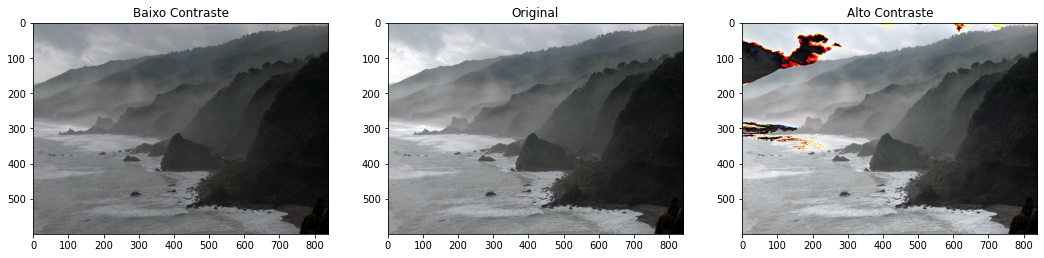

In [16]:
matrix_1 = np.ones(img_rgb.shape) * 0.8
matrix_2 = np.ones(img_rgb.shape) * 1.2

img_baixo_contraste = np.uint8(cv.multiply(np.float64(img_rgb), matrix_1))
img_alto_contraste = np.uint8(cv.multiply(np.float64(img_rgb), matrix_2))

# Mostar imagens
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_baixo_contraste); plt.title("Baixo Contraste");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_alto_contraste); plt.title("Alto Contraste");

A imagem *img_alto_contraste* possui detalhes que não se enquandram na imagem. Isto acontece porque alguns dos pixels excederam o limite de 255 causando que fosse atribuido um uint8 aleatorio.

Para corrigir este problema, temos de defenir os extremos com **np.clip** entre 0 e 255.

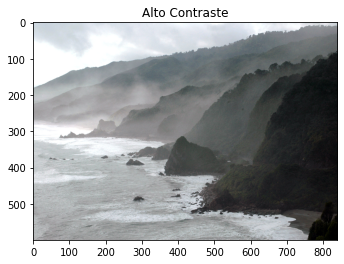

In [18]:
img_alto_contraste_fixed = np.uint8(np.clip(cv.multiply(np.float64(img_rgb), matrix_2), 0, 255))
plt.imshow(img_alto_contraste_fixed); plt.title("Alto Contraste");

### Image Threshold

Image threshold diz respeito a criação de um espectro de valores aceites. Caso o valor do pixel exceda ou não alcance o intervalo defenido o seu valor é igualado a X valor.

Text(0.5, 1.0, 'Thresholded')

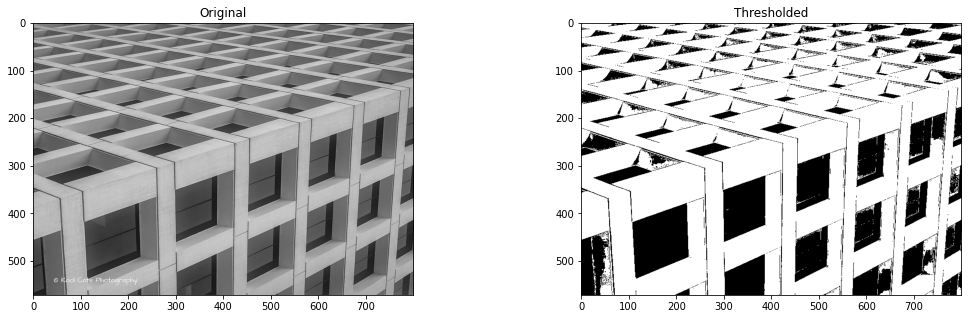

In [25]:
image_2 = cv.imread('./img/building-windows.jpg', cv.IMREAD_GRAYSCALE) # Ler imagme na escala de cinzentos

# imagem, escala, valor maximo, tipo de threshold
retval, img_thresh = cv.threshold(image_2, 100, 255, cv.THRESH_BINARY)

# Mostrar imagem
plt.figure(figsize = [18, 5])
plt.subplot(121);plt.imshow(image_2, cmap="gray");plt.title('Original')
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title('Thresholded')

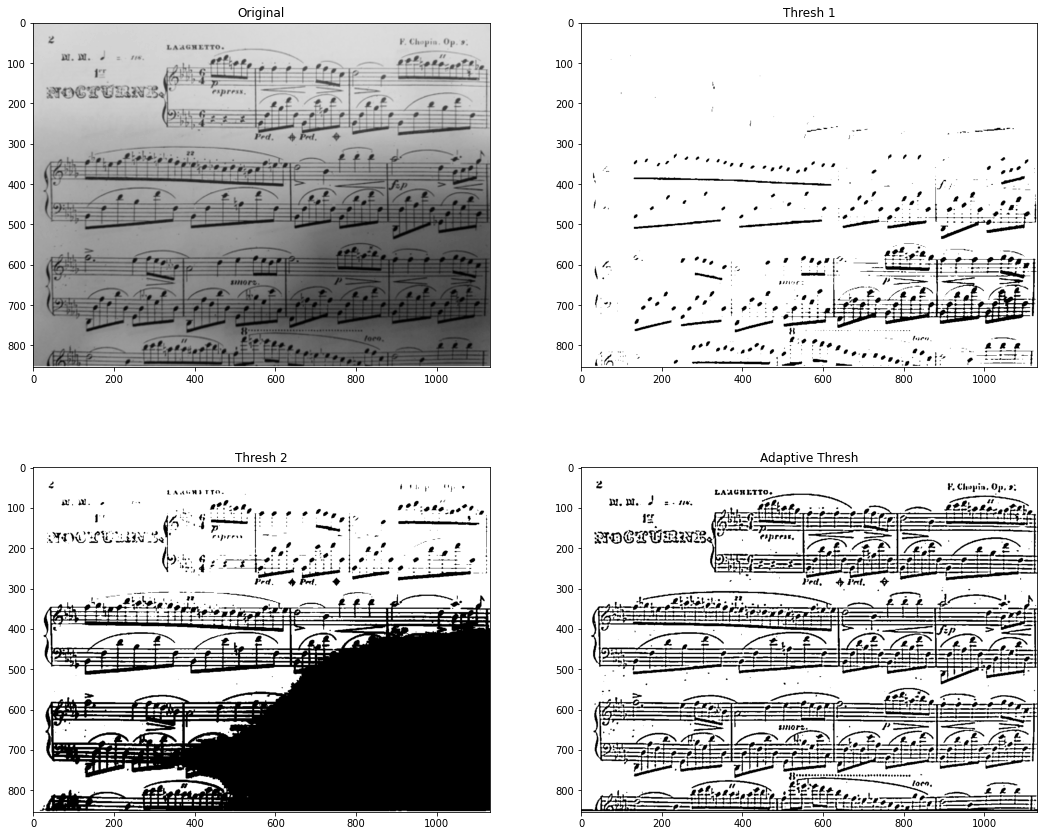

In [30]:
# Outro exemplo de threshold
sheet_img = cv.imread('./img/Piano_Sheet_Music.png', cv.IMREAD_GRAYSCALE)

retval, img_thresh_gb_1 = cv.threshold(sheet_img, 50, 255, cv.THRESH_BINARY)
retval, img_thresh_gb_2 = cv.threshold(sheet_img, 130, 255, cv.THRESH_BINARY)

# Threshold adaptive
img_adap_thresh_gb_1 = cv.adaptiveThreshold(sheet_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18, 15])
plt.subplot(221); plt.imshow(sheet_img, cmap="gray");plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gb_1, cmap="gray");plt.title("Thresh 1");
plt.subplot(223); plt.imshow(img_thresh_gb_2, cmap="gray");plt.title("Thresh 2");
plt.subplot(224); plt.imshow(img_adap_thresh_gb_1, cmap="gray");plt.title("Adaptive Thresh");